In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

EPSG:4269


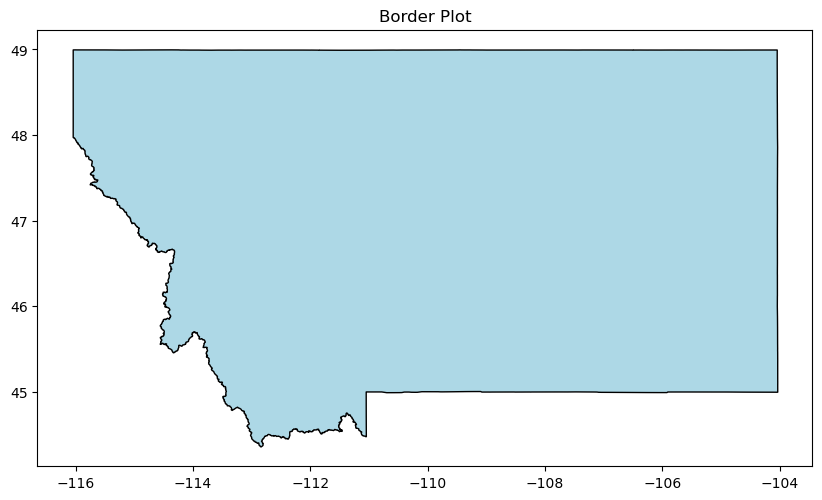

EPSG:4269


In [9]:
shapefile_path = 'data\state\state\montana_border.shp'
montana_gdf = gpd.read_file(shapefile_path)

print(montana_gdf.crs)
montana_gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')

plt.title('Border Plot')
plt.show()

print(montana_gdf.crs)

Rain

<Figure size 1000x1000 with 0 Axes>

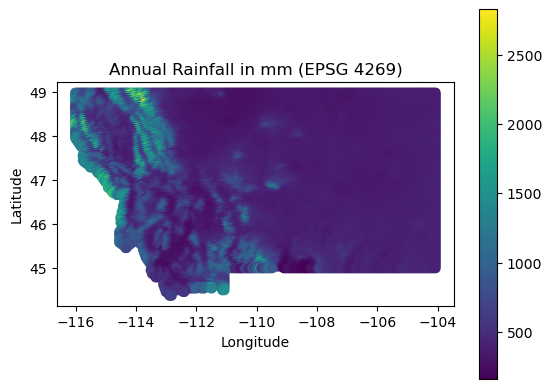

In [11]:
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Replace 'your_file.tif' with the path to your .tif file
tif_path = 'data\\other\\annual_meanrain.tif'

# Open the .tif file and read the data
with rasterio.open(tif_path) as rain_src:
    rain_data = rain_src.read(1)  # Read the first band
    rain_transform = rain_src.transform

    # Get coordinates and pixel values
    rain_rows, rain_cols = np.where(rain_data != rain_src.nodata)  # Exclude nodata values
    rain_pixel_values = rain_data[rain_rows, rain_cols]

    # Convert pixel row/col to coordinates
    rain_xs, rain_ys = rasterio.transform.xy(rain_transform, rain_rows, rain_cols)

# Create a DataFrame with coordinates and pixel values
rain_df = pd.DataFrame({
    'rain_x': rain_xs,
    'rain_y': rain_ys,
    'annual_rain_mm': rain_pixel_values  # Change to annual rain in mm
})

# Create a GeoDataFrame with the original CRS
rain_gdf = gpd.GeoDataFrame(
    rain_df,
    geometry=[Point(x, y) for x, y in zip(rain_df['rain_x'], rain_df['rain_y'])],
    crs=rain_src.crs  # Use the coordinate reference system of the original file
)

# Convert the GeoDataFrame to EPSG 4269 (NAD83)
rain_gdf_4269 = rain_gdf.to_crs(epsg=4269)

# Plot the GeoDataFrame
plt.figure(figsize=(10, 10))
rain_gdf_4269.plot(column='annual_rain_mm', cmap='viridis', legend=True)  # Using a suitable colormap for rain
plt.title('Annual Rainfall in mm (EPSG 4269)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2575990004.py:26: FutureWarning: The provided callable <function mean at 0x0000026055619FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_rain = rain_with_grid.groupby('index_right').agg({


<Axes: >

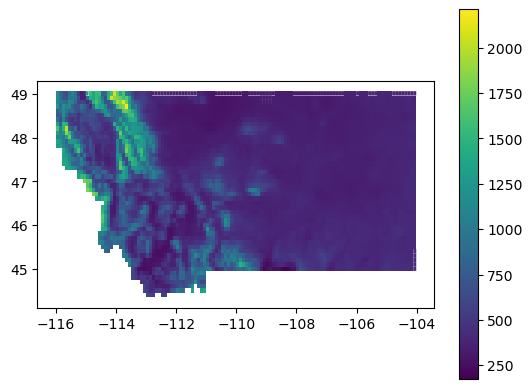

In [12]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np

# Assuming your rainfall data is in a GeoDataFrame called rain_gdf
# Step 1: Create a grid overlay based on the bounds of rain_gdf
minx, miny, maxx, maxy = rain_gdf.total_bounds
grid_size = 0.1  # Adjust the size based on your needs (e.g., degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=rain_gdf.crs)

# Step 2: Perform a spatial join to associate rainfall points with grid cells
rain_with_grid = gpd.sjoin(rain_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the rainfall data for each grid cell (e.g., average rainfall)
aggregated_rain = rain_with_grid.groupby('index_right').agg({
    'annual_rain_mm': np.mean,  # You can change to np.max, np.min, etc., if needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_rain_gdf = grid_gdf.merge(aggregated_rain, left_index=True, right_on='index_right')

aggregated_rain_gdf = aggregated_rain_gdf.to_crs(4269)

# Step 5: Plot or save the result
aggregated_rain_gdf.plot(column='annual_rain_mm', legend=True)





In [13]:
print(len(grid_cells))

print(aggregated_rain_gdf.crs)
aggregated_rain_gdf

5640
EPSG:4269


,geometry,index_right,annual_rain_mm
0,"POLYGON ((-115.91667 44.35833, -115.91667 44.4...",0.0,NaN
1,"POLYGON ((-115.91667 44.45833, -115.91667 44.5...",1.0,NaN
2,"POLYGON ((-115.91667 44.55833, -115.91667 44.6...",2.0,NaN
3,"POLYGON ((-115.91667 44.65833, -115.91667 44.7...",3.0,NaN
4,"POLYGON ((-115.91667 44.75833, -115.91667 44.8...",4.0,NaN
...,...,...,...
5635,"POLYGON ((-104.01667 48.55833, -104.01667 48.6...",5635.0,389.281647
5636,"POLYGON ((-104.01667 48.65833, -104.01667 48.7...",5636.0,386.425018
5637,"POLYGON ((-104.01667 48.75833, -104.01667 48.8...",5637.0,373.666107
5638,"POLYGON ((-104.01667 48.85833, -104.01667 48.9...",5638.0,372.281677


State Shape

Temperature

In [14]:
import rasterio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

#if i combine this immediately it blows up


#------------------------------------------------------------
#min
min_tif_path = 'data\\other\\annual_meanTemp_min.tif'

# Open the .tif file and read the data
with rasterio.open(min_tif_path) as min_src:
    min_data = min_src.read(1)  # Read the first band
    min_transform = min_src.transform

    # Get coordinates and pixel values
    min_rows, min_cols = np.where(min_data != min_src.nodata)  # Exclude nodata values
    min_pixel_values = min_data[min_rows, min_cols]

    # Convert pixel row/col to coordinates
    min_xs, min_ys = rasterio.transform.xy(min_transform, min_rows, min_cols)

# Create a DataFrame with coordinates and pixel values
min_df = pd.DataFrame({
    'min_x': min_xs,
    'min_y': min_ys,
    'min_temperature_kelvin': min_pixel_values,  # Change to minimum temperature in Kelvin
    'min_temperature_fahrenheit': (min_pixel_values - 273.15) * 9/5 + 32  # Convert to Fahrenheit
})

# Create a GeoDataFrame with the original CRS
min_gdf = gpd.GeoDataFrame(
    min_df,
    geometry=[Point(x, y) for x, y in zip(min_df['min_x'], min_df['min_y'])],
    crs=min_src.crs  # Use the coordinate reference system of the original file
)

print(min_gdf.head())
#----------------------------

print()

#max
max_tif_path = 'data\\other\\annual_meanTemp_max.tif'

# Open the .tif file and read the data
with rasterio.open(max_tif_path) as max_src:
    max_data = max_src.read(1)  # Read the first band
    max_transform = max_src.transform

    # Get coordinates and pixel values
    max_rows, max_cols = np.where(max_data != max_src.nodata)  # Exclude nodata values
    max_pixel_values = max_data[max_rows, max_cols]

    # Convert pixel row/col to coordinates
    max_xs, max_ys = rasterio.transform.xy(max_transform, max_rows, max_cols)

# Create a DataFrame with coordinates and pixel values
max_df = pd.DataFrame({
    'max_x': max_xs,
    'max_y': max_ys,
    'max_temperature_kelvin': max_pixel_values,  # Change to maximum temperature in Kelvin
    'max_temperature_fahrenheit': (max_pixel_values - 273.15) * 9/5 + 32  # Convert to Fahrenheit
})

# Create a GeoDataFrame with the original CRS
max_gdf = gpd.GeoDataFrame(
    max_df,
    geometry=[Point(x, y) for x, y in zip(max_df['max_x'], max_df['max_y'])],
    crs=max_src.crs  # Use the coordinate reference system of the original file
)

# Display the first few rows of the GeoDataFrame
print(max_gdf.head())


        min_x      min_y  min_temperature_kelvin  min_temperature_fahrenheit  \
0 -116.016667  48.983333              272.198547                   30.287395   
1 -115.975000  48.983333              271.584290                   29.181732   
2 -115.933333  48.983333              271.935883                   29.814600   
3 -115.891667  48.983333              272.142670                   30.186817   
4 -115.850000  48.983333              270.742920                   27.667267   

                      geometry  
0  POINT (-116.01667 48.98333)  
1  POINT (-115.97500 48.98333)  
2  POINT (-115.93333 48.98333)  
3  POINT (-115.89167 48.98333)  
4  POINT (-115.85000 48.98333)  

        max_x      max_y  max_temperature_kelvin  max_temperature_fahrenheit  \
0 -116.016667  48.983333              282.098541                   48.107384   
1 -115.975000  48.983333              279.577393                   43.569317   
2 -115.933333  48.983333              280.153595                   44.606483   


                      geometry  average_temperature_fahrenheit
0  POINT (-116.01667 48.98334)                       39.197388
1  POINT (-115.97500 48.98334)                       36.375526
2  POINT (-115.93333 48.98334)                       37.210541
3  POINT (-115.89167 48.98334)                       38.685455
4  POINT (-115.85000 48.98334)                       38.966595


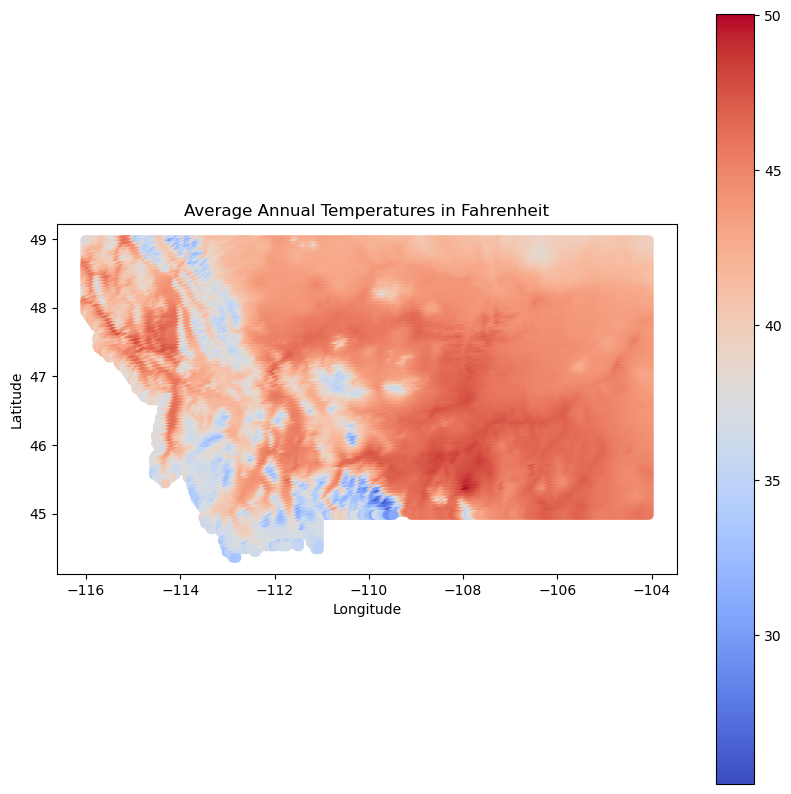

In [15]:
tempCombined_gdf = min_gdf.merge(max_gdf, on="geometry", suffixes=("_min", "_max"))
tempCombined_gdf['average_temperature_fahrenheit'] = (tempCombined_gdf['min_temperature_fahrenheit'] + tempCombined_gdf['max_temperature_fahrenheit']) / 2

tempCombined_gdf = tempCombined_gdf.to_crs(4269)


print(tempCombined_gdf[['geometry', 'average_temperature_fahrenheit']].head())

fig, ax = plt.subplots(figsize=(10, 10))
tempCombined_gdf.plot(column='average_temperature_fahrenheit', cmap='coolwarm', legend=True, ax=ax)
plt.title('Average Annual Temperatures in Fahrenheit')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
print(tempCombined_gdf.crs)
tempCombined_gdf = tempCombined_gdf.to_crs(4269)
print(tempCombined_gdf.crs)

EPSG:4269
EPSG:4269


C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\3903519708.py:25: FutureWarning: The provided callable <function mean at 0x0000026055619FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_temp = temp_with_grid.groupby('index_right').agg({


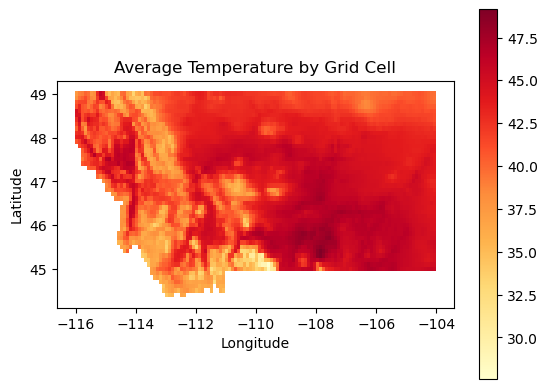

In [19]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np

# Step 1: Create a grid overlay based on the bounds of tempCombined_gdf
minx, miny, maxx, maxy = tempCombined_gdf.total_bounds
grid_size = 0.1  # Adjust this size based on your needs (in degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=tempCombined_gdf.crs)

# Step 2: Perform a spatial join to associate temperature points with grid cells
temp_with_grid = gpd.sjoin(tempCombined_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the temperature data for each grid cell (e.g., average temperature)
aggregated_temp = temp_with_grid.groupby('index_right').agg({
    'average_temperature_fahrenheit': np.mean,  # You can use np.max, np.min, etc., as needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_temp_gdf = grid_gdf.merge(aggregated_temp, left_index=True, right_on='index_right')

aggregated_temp_gdf = aggregated_temp_gdf.to_crs(4269)

# Step 5: Plot or save the result
aggregated_temp_gdf.plot(column='average_temperature_fahrenheit', cmap='YlOrRd', legend=True)
# Customize the plot
plt.title('Average Temperature by Grid Cell')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ndvi

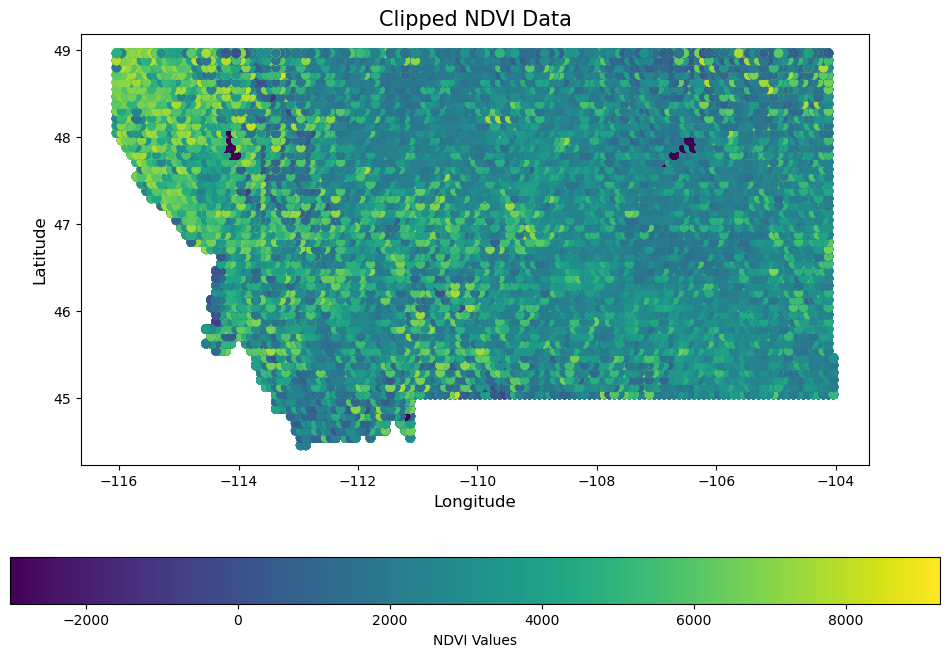

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the clipped GeoJSON file
clipped_ndvi = gpd.read_file('clipped_ndvi.geojson')

# Step 2: Create a plot
fig, ax = plt.subplots(figsize=(12, 8))

# Step 3: Plot the clipped NDVI data using the Viridis colormap
clipped_ndvi.plot(column='ndvi', ax=ax, cmap='viridis', legend=True,
                  legend_kwds={'label': "NDVI Values", 'orientation': "horizontal"})

# Step 4: Customize the plot
plt.title('Clipped NDVI Data', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Step 5: Show the plot
plt.show()

<h1>Pandas Dataframes</h1>

Rain

C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2267044065.py:27: FutureWarning: The provided callable <function mean at 0x0000026055619FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_rain = rain_with_grid.groupby('index_right').agg({
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2267044065.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aggregated_rain_gdf['lat'] = aggregated_rain_gdf.geometry.centroid.y
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2267044065.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aggregated_rain_gdf['lon'] = aggregated_rain_

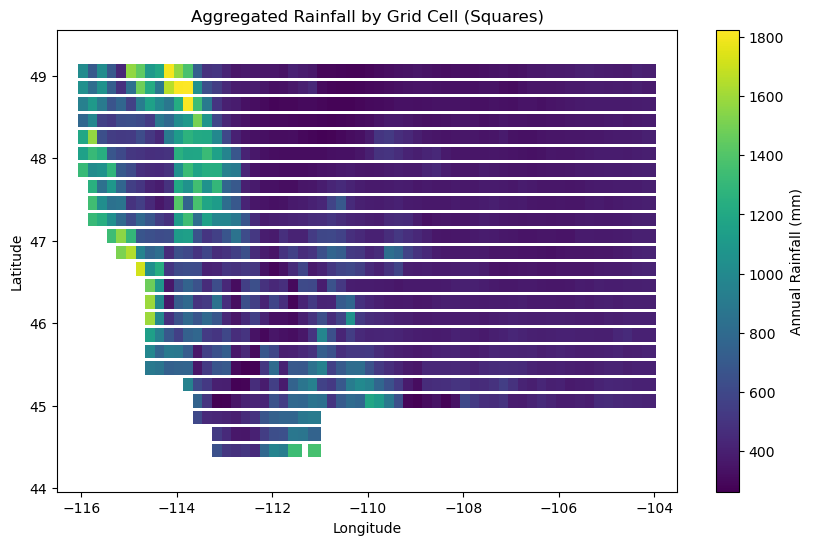

In [ ]:

import geopandas as gpd
from shapely.geometry import box
import numpy as np
import pandas as pd

# Assuming your rainfall data is in a GeoDataFrame called rain_gdf
# Step 1: Create a grid overlay based on the bounds of rain_gdf
minx, miny, maxx, maxy = rain_gdf.total_bounds
grid_size = 0.1  # Adjust the size based on your needs (e.g., degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=rain_gdf.crs)

# Step 2: Perform a spatial join to associate rainfall points with grid cells
rain_with_grid = gpd.sjoin(rain_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the rainfall data for each grid cell (e.g., average rainfall)
aggregated_rain = rain_with_grid.groupby('index_right').agg({
    'annual_rain_mm': np.mean,  # You can change to np.max, np.min, etc., if needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_rain_gdf = grid_gdf.merge(aggregated_rain, left_index=True, right_on='index_right')

# Step 5: Extract latitude and longitude from the grid geometries
aggregated_rain_gdf['lat'] = aggregated_rain_gdf.geometry.centroid.y
aggregated_rain_gdf['lon'] = aggregated_rain_gdf.geometry.centroid.x

# Step 6: Convert to pandas DataFrame
aggregated_rain_df = aggregated_rain_gdf[['lat', 'lon', 'annual_rain_mm']]

# Step 7: Plot the DataFrame with square markers and no cell outlines
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_rain_df['lon'], aggregated_rain_df['lat'], 
            c=aggregated_rain_df['annual_rain_mm'], cmap='viridis', 
            s=100, marker='s', edgecolor='none')  # Remove outline
plt.colorbar(label='Annual Rainfall (mm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Aggregated Rainfall by Grid Cell (Squares)')

# Set smaller y-axis range (adjust as needed)
plt.ylim(aggregated_rain_df['lat'].min() - 0.5, aggregated_rain_df['lat'].max() + 0.5)  # Adjust vertical scale

plt.show()

In [45]:
len(grid_cells)

1440

In [29]:
aggregated_rain_df

,lat,lon,annual_rain_mm
0,44.408333,-115.966667,NaN
1,44.508333,-115.966667,NaN
2,44.608333,-115.966667,NaN
3,44.708333,-115.966667,NaN
4,44.808333,-115.966667,NaN
...,...,...,...
5635,48.608333,-104.066667,389.281647
5636,48.708333,-104.066667,386.425018
5637,48.808333,-104.066667,373.666107
5638,48.908333,-104.066667,372.281677


C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\361063986.py:27: FutureWarning: The provided callable <function mean at 0x0000026055619FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_temp = temp_with_grid.groupby('index_right').agg({
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\361063986.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aggregated_temp_gdf['lat'] = aggregated_temp_gdf.geometry.centroid.y
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\361063986.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aggregated_temp_gdf['lon'] = aggregated_temp_gdf

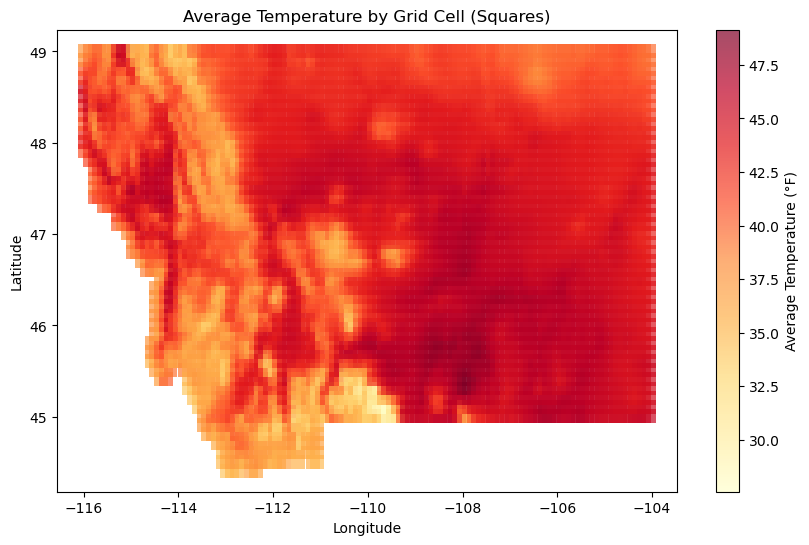

In [30]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a grid overlay based on the bounds of tempCombined_gdf
minx, miny, maxx, maxy = tempCombined_gdf.total_bounds
grid_size = 0.1  # Adjust this size based on your needs (in degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=tempCombined_gdf.crs)

# Step 2: Perform a spatial join to associate temperature points with grid cells
temp_with_grid = gpd.sjoin(tempCombined_gdf, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the temperature data for each grid cell (e.g., average temperature)
aggregated_temp = temp_with_grid.groupby('index_right').agg({
    'average_temperature_fahrenheit': np.mean,  # You can use np.max, np.min, etc., as needed
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_temp_gdf = grid_gdf.merge(aggregated_temp, left_index=True, right_on='index_right')

# Step 5: Extract latitude and longitude from the grid geometries
aggregated_temp_gdf['lat'] = aggregated_temp_gdf.geometry.centroid.y
aggregated_temp_gdf['lon'] = aggregated_temp_gdf.geometry.centroid.x

# Step 6: Convert to pandas DataFrame with lat, lon, and the temperature data
aggregated_temp_df = aggregated_temp_gdf[['lat', 'lon', 'average_temperature_fahrenheit']]

# Step 7: Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_temp_df['lon'], aggregated_temp_df['lat'], 
            c=aggregated_temp_df['average_temperature_fahrenheit'], cmap='YlOrRd', 
            s=100, alpha=0.7, marker='s', edgecolor='none')  # 's' for square markers
plt.colorbar(label='Average Temperature (°F)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Temperature by Grid Cell (Squares)')
plt.show()


In [46]:
len(grid_cells)

1440

In [31]:
aggregated_temp_df

,lat,lon,average_temperature_fahrenheit
0,44.408331,-115.966668,NaN
1,44.508331,-115.966668,NaN
2,44.608331,-115.966668,NaN
3,44.708331,-115.966668,NaN
4,44.808331,-115.966668,NaN
...,...,...,...
5635,48.608331,-104.066668,41.123627
5636,48.708331,-104.066668,40.464432
5637,48.808331,-104.066668,39.920071
5638,48.908331,-104.066668,39.606617


C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2516827351.py:30: FutureWarning: The provided callable <function mean at 0x0000026055619FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2516827351.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aggregated_ndvi_gdf['lat'] = aggregated_ndvi_gdf.geometry.centroid.y
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\2516827351.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aggregated_ndvi_gdf['lon'] = aggregated_ndvi_

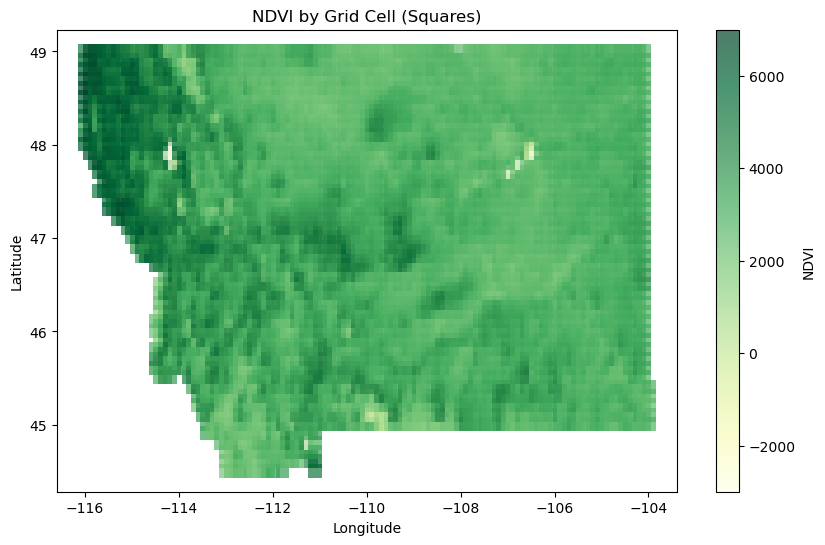

In [33]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming clipped_ndvi is already a GeoDataFrame
clipped_ndvi = clipped_ndvi.to_crs(4269)

# Step 1: Create a grid overlay
minx, miny, maxx, maxy = clipped_ndvi.total_bounds
grid_size = 0.1  # Adjust as needed for grid cell size

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=clipped_ndvi.crs)

# Step 2: Spatially join NDVI points to grid cells
ndvi_with_grid = gpd.sjoin(clipped_ndvi, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate NDVI values per grid cell (mean, max, etc.)
aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({
    'ndvi': np.mean,  # Change aggregation as needed (e.g., np.max, np.min)
}).reset_index()

# Step 4: Merge with the grid to retain grid geometries
aggregated_ndvi_gdf = grid_gdf.merge(aggregated_ndvi, left_index=True, right_on='index_right')

# Step 5: Extract latitude and longitude from the grid geometries
aggregated_ndvi_gdf['lat'] = aggregated_ndvi_gdf.geometry.centroid.y
aggregated_ndvi_gdf['lon'] = aggregated_ndvi_gdf.geometry.centroid.x

# Step 6: Convert to pandas DataFrame with lat, lon, and NDVI values
aggregated_ndvi_df = aggregated_ndvi_gdf[['lat', 'lon', 'ndvi']]

# Step 7: Plot the DataFrame as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_ndvi_df['lon'], aggregated_ndvi_df['lat'], 
            c=aggregated_ndvi_df['ndvi'], cmap='YlGn', 
            s=100, alpha=0.7, marker='s', edgecolor='none')  # 's' for square markers
plt.colorbar(label='NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NDVI by Grid Cell (Squares)')
plt.show()

In [47]:
len(grid_cells)

1440

In [34]:
aggregated_ndvi_df

,lat,lon,ndvi
0,48.008333,-115.991668,5995.819444
1,48.108333,-115.991668,5585.208333
2,48.208333,-115.991668,3844.375000
3,48.308333,-115.991668,5410.729167
4,48.408333,-115.991668,5704.750000
...,...,...,...
4611,45.008333,-103.991668,2919.666667
4612,45.108333,-103.991668,2985.625000
4613,45.208333,-103.991668,2476.333333
4614,45.308333,-103.991668,2586.166667


In [41]:
aggregated_rain_df

,lat,lon,annual_rain_mm
0,44.408333,-115.966667,NaN
1,44.508333,-115.966667,NaN
2,44.608333,-115.966667,NaN
3,44.708333,-115.966667,NaN
4,44.808333,-115.966667,NaN
...,...,...,...
5635,48.608333,-104.066667,389.281647
5636,48.708333,-104.066667,386.425018
5637,48.808333,-104.066667,373.666107
5638,48.908333,-104.066667,372.281677


In [42]:
aggregated_temp_df

,lat,lon,average_temperature_fahrenheit
0,44.408331,-115.966668,NaN
1,44.508331,-115.966668,NaN
2,44.608331,-115.966668,NaN
3,44.708331,-115.966668,NaN
4,44.808331,-115.966668,NaN
...,...,...,...
5635,48.608331,-104.066668,41.123627
5636,48.708331,-104.066668,40.464432
5637,48.808331,-104.066668,39.920071
5638,48.908331,-104.066668,39.606617


C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\1631309359.py:23: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  ndvi_with_grid = gpd.sjoin(clipped_ndvi, grid_gdf, how="left", predicate="within")
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\1631309359.py:26: FutureWarning: The provided callable <function mean at 0x0000026055619FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({
C:\Users\Alex\AppData\Local\Temp\ipykernel_27920\1631309359.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operat

Number of rows in the DataFrame: 4568
         lat         lon         ndvi
0  48.008333 -115.966667  6041.854167
1  48.108333 -115.966667  4934.916667
2  48.208333 -115.966667  4461.166667
3  48.308333 -115.966667  6379.708333
4  48.408333 -115.966667  6182.666667


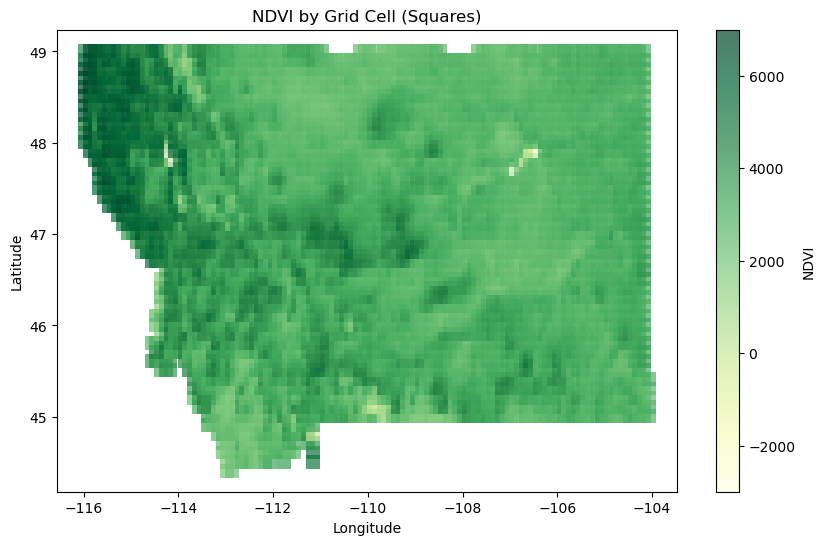

In [50]:
import geopandas as gpd
from shapely.geometry import box
import numpy as np
import pandas as pd

# Step 1: Create a grid overlay based on the bounds of the rain_gdf (or use similar logic for NDVI data)
minx, miny, maxx, maxy = rain_gdf.total_bounds  # Or your NDVI GeoDataFrame
grid_size = 0.1  # Adjust the size based on your needs (in degrees or CRS units)

# Create grid cells
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + grid_size, y + grid_size))
        y += grid_size
    x += grid_size

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=rain_gdf.crs)  # Use your appropriate CRS

# Step 2: Spatially join NDVI data to grid cells
ndvi_with_grid = gpd.sjoin(clipped_ndvi, grid_gdf, how="left", predicate="within")

# Step 3: Aggregate the NDVI data for each grid cell (you can change aggregation method)
aggregated_ndvi = ndvi_with_grid.groupby('index_right').agg({
    'ndvi': np.mean,  # Change aggregation as needed (e.g., np.max, np.min)
}).reset_index()

# Step 4: Merge the aggregated data with the grid to retain grid geometries
aggregated_ndvi_gdf = grid_gdf.merge(aggregated_ndvi, left_index=True, right_on='index_right')

# Step 5: Filter out rows where 'ndvi' is NaN (empty grid cells that don't contain data)
aggregated_ndvi_gdf = aggregated_ndvi_gdf.dropna(subset=['ndvi'])

# Step 6: Extract latitude and longitude from the grid geometries
aggregated_ndvi_gdf['lat'] = aggregated_ndvi_gdf.geometry.centroid.y
aggregated_ndvi_gdf['lon'] = aggregated_ndvi_gdf.geometry.centroid.x

# Step 7: Convert to pandas DataFrame and keep grid cell positions along with NDVI values
aggregated_ndvi_df = aggregated_ndvi_gdf[['lat', 'lon', 'ndvi']]

# Step 8: Verify that the number of entries is correct (1140 entries expected)
print(f'Number of rows in the DataFrame: {len(aggregated_ndvi_df)}')

# Step 9: Save the data to a CSV file (or use the DataFrame for further analysis)
aggregated_ndvi_df.to_csv('aggregated_ndvi_with_positions.csv', index=False)

# Optionally, print the DataFrame to see the result
print(aggregated_ndvi_df.head())

# Step 10: Plot (optional) to visualize the NDVI data on the grid
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(aggregated_ndvi_df['lon'], aggregated_ndvi_df['lat'], 
            c=aggregated_ndvi_df['ndvi'], cmap='YlGn', 
            s=100, alpha=0.7, marker='s', edgecolor='none')  # 's' for square markers
plt.colorbar(label='NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NDVI by Grid Cell (Squares)')
plt.show()


,lat,lon,ndvi
0,48.008333,-115.966667,6041.854167
1,48.108333,-115.966667,4934.916667
2,48.208333,-115.966667,4461.166667
3,48.308333,-115.966667,6379.708333
4,48.408333,-115.966667,6182.666667
...,...,...,...
4563,45.008333,-104.066667,2919.666667
4564,45.108333,-104.066667,2985.625000
4565,45.208333,-104.066667,2476.333333
4566,45.308333,-104.066667,2586.166667
